# HW Unsupervised Supervised Learning 

### Agi Rahmawandi <br> Batch 57

## Airline Customer Value Analysis Case

### Dataset ini berisi data customer sebuah perusahaan penerbangan dan beberapa fitur yang dapat menggambarkan value dari customer tersebut


https://www.kaggle.com/code/mustiadizaki/airline-customer-value-analysis-case

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import matplotlib.pyplot as plt


In [157]:
df = pd.read_csv('dataset/flight.csv')

In [158]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [160]:
df_1 = df.copy()
df_1["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_1["FIRST_FLIGHT_DATE"], errors="coerce")
df_1["LAST_FLIGHT_DATE"] = pd.to_datetime(df_1["LAST_FLIGHT_DATE"], errors="coerce")
df_1["LOAD_TIME"] = pd.to_datetime(df_1["LOAD_TIME"], errors="coerce")

In [161]:
# Hitung Recency, Frequency, Monetary
# df_1["Recency"] = (df_1["LOAD_TIME"] - df_1["LAST_FLIGHT_DATE"]).dt.days
# df_1["Frequency"] = df_1["FLIGHT_COUNT"]
df_1["total_revenue"] = df_1[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)


### 1 .Berapa banyak customer yang melakukan penerbangan dalam setahun terkahir

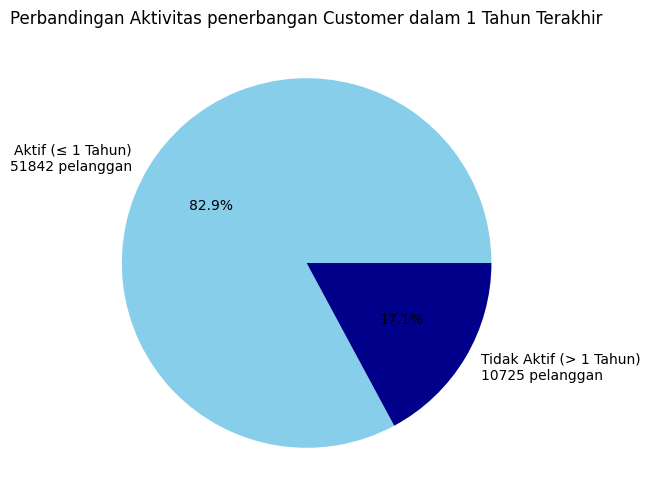

51842

In [162]:
# Hitung jumlah customer per kategori
aktif_count = ((df_1["LOAD_TIME"] - df_1["LAST_FLIGHT_DATE"]).dt.days <= 365).sum()
tidak_aktif_count = ((df_1["LOAD_TIME"] - df_1["LAST_FLIGHT_DATE"]).dt.days > 365).sum()

# Data untuk pie chart
counts = [aktif_count, tidak_aktif_count]
labels = [
    f"Aktif (≤ 1 Tahun)\n{aktif_count} pelanggan",
    f"Tidak Aktif (> 1 Tahun)\n{tidak_aktif_count} pelanggan"
]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["skyblue", "darkblue"])
plt.title("Perbandingan Aktivitas penerbangan Customer dalam 1 Tahun Terakhir")
plt.show()
aktif_count

### 2.Customer dengan Tier/peringkat apa yang sering melakukan penerbangan ?

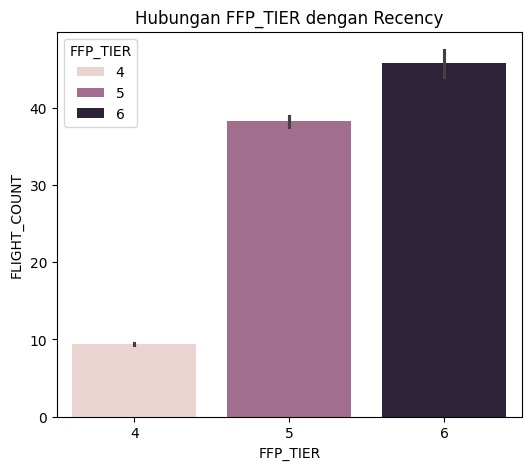

In [163]:

plt.figure(figsize=(6,5))
sns.barplot(data=df_1, x="FFP_TIER", y="FLIGHT_COUNT", hue='FFP_TIER')
plt.title("Hubungan FFP_TIER dengan Recency")
plt.show()

### 3. Apakah setiap tahun mengalami penigkatan jumlah penerbangan ?

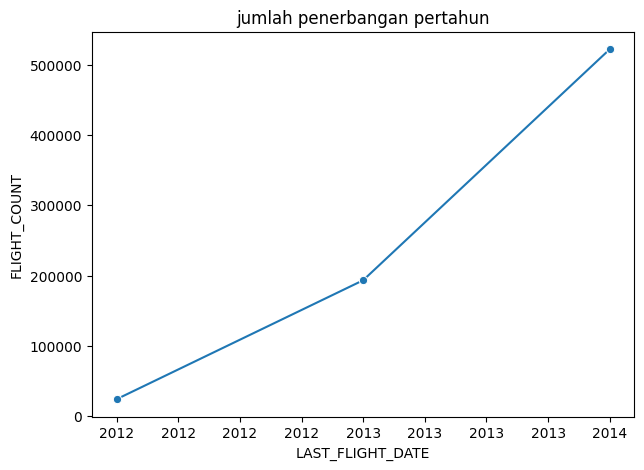

In [164]:

freq_trend = df_1.groupby(df_1["LAST_FLIGHT_DATE"].dt.year)["FLIGHT_COUNT"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=freq_trend, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", marker="o")
plt.title("jumlah penerbangan pertahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 4. Berapa jumlah penerbangan jika dilihat dari Tiernya ? 

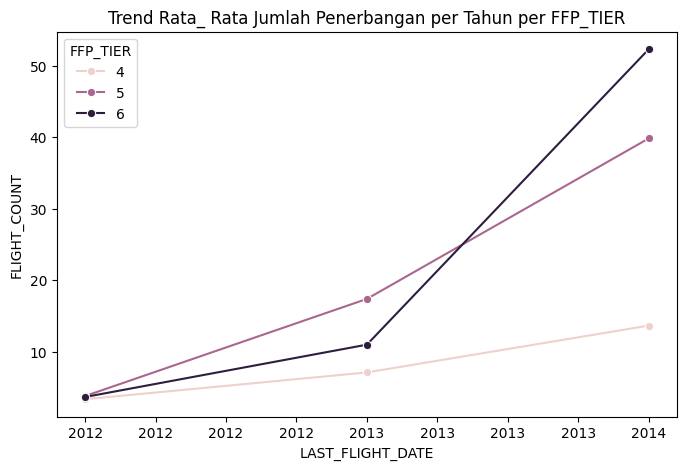

,LAST_FLIGHT_DATE,FFP_TIER,FLIGHT_COUNT
0,2012.0,4,3.356203
1,2012.0,5,3.800000
2,2012.0,6,3.666667
3,2013.0,4,7.100379
4,2013.0,5,17.380282
5,2013.0,6,10.985849
6,2014.0,4,13.649837
7,2014.0,5,39.819803
8,2014.0,6,52.290196


In [165]:
flights_tier_year = df_1.groupby([(df_1["LAST_FLIGHT_DATE"].dt.year),"FFP_TIER"])["FLIGHT_COUNT"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=flights_tier_year, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", hue="FFP_TIER", marker="o")
plt.title("Trend Rata_ Rata Jumlah Penerbangan per Tahun per FFP_TIER")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()
flights_tier_year

### 4.Berapa nilai rata - rata  pedapatan pada setiap Tiernya? 

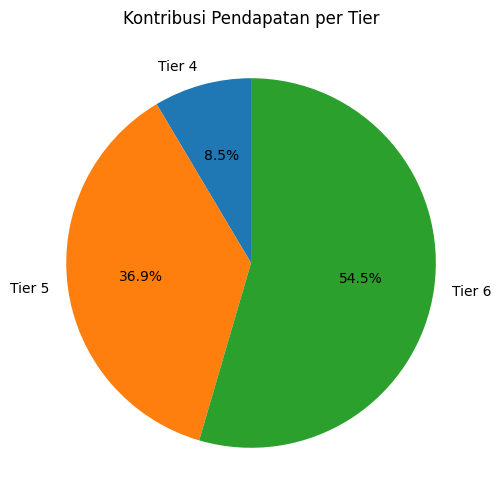

In [166]:
revenue_by_tier = df_1.groupby("FFP_TIER")["total_revenue"].mean().reset_index()

# Visualisasi pie chart semua tier
plt.figure(figsize=(6,6))
plt.pie(revenue_by_tier["total_revenue"],
        labels=[f"Tier {tier}" for tier in revenue_by_tier["FFP_TIER"]],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Kontribusi Pendapatan per Tier")
plt.show()

## 5,Bagaiaman pendapatan pertahunnya apakah mengalami kenaikan ?

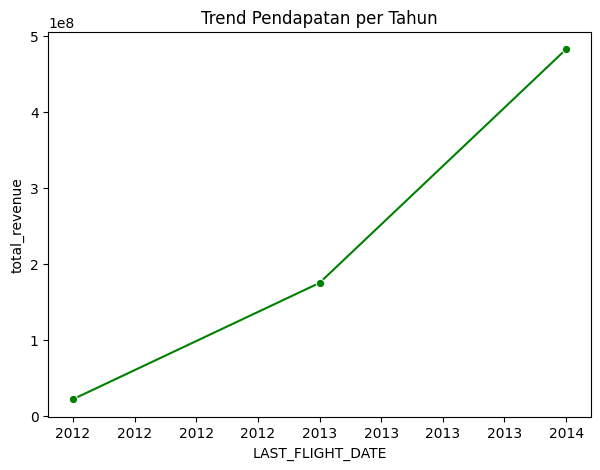

In [167]:
revenue_by_year = df_1.groupby((df_1["LAST_FLIGHT_DATE"].dt.year))["total_revenue"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=revenue_by_year, x="LAST_FLIGHT_DATE", y="total_revenue", marker="o", color="green")
plt.title("Trend Pendapatan per Tahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 6. Tier/peringkat apa yang paling banyak diperoleh oleh customer ?

FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64

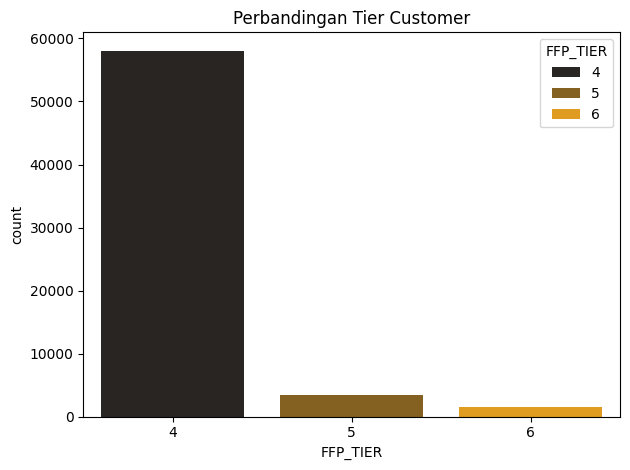

In [168]:
sns.countplot(data=df_1, x='FFP_TIER', hue='FFP_TIER', palette='dark:orange')
plt.title('Perbandingan Tier Customer')
plt.tight_layout()
df['FFP_TIER'].value_counts()

### Deskriftif statistic

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [170]:
df.describe(include='object').T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [171]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
MEMBER_NO                    0         0.000000
LAST_FLIGHT_DATE             0         0.000000
Points_Sum                   0         0.000000
avg_discount                 0         0.000000
EXCHANGE_COUNT               0         0.000000
MAX_INTERVAL                 0         0.000000
AVG_INTERVAL                 0         0.000000
LAST_TO_END                  0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
FFP_DATE                     0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0

### Univaiate analisis 


In [172]:
num_col= df.select_dtypes(include=['int64','float64']).columns
obj_col = df.select_dtypes(include=['object']).columns

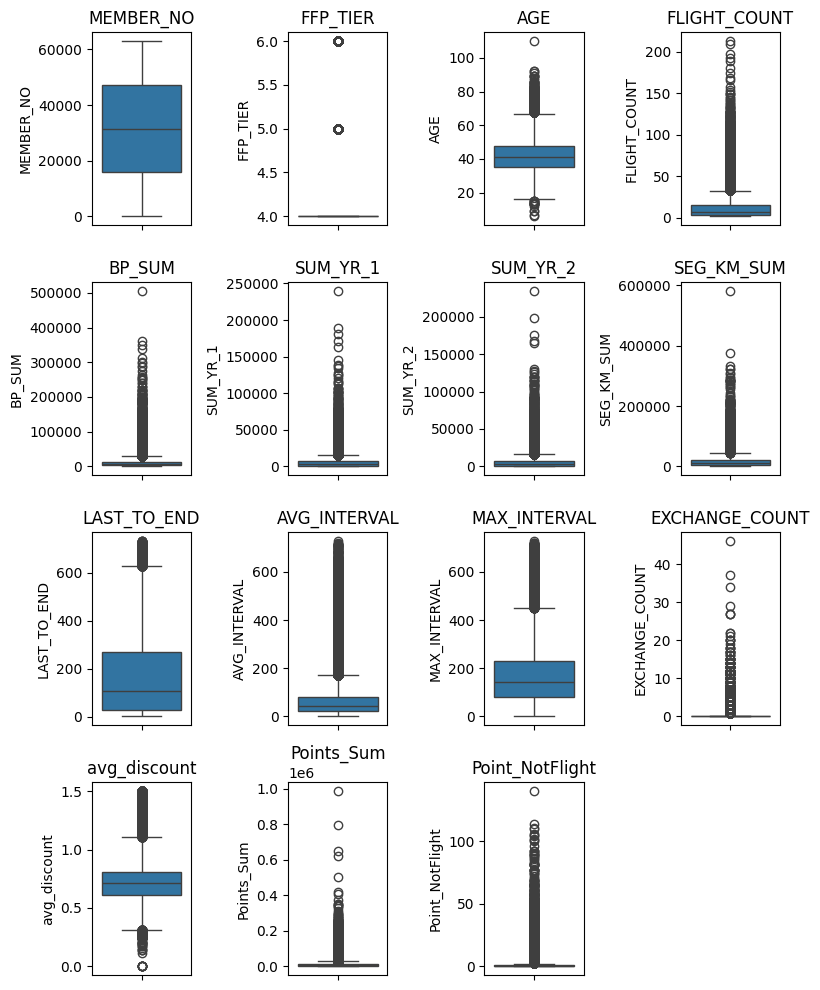

In [173]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_col)/4)), ncols=4, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

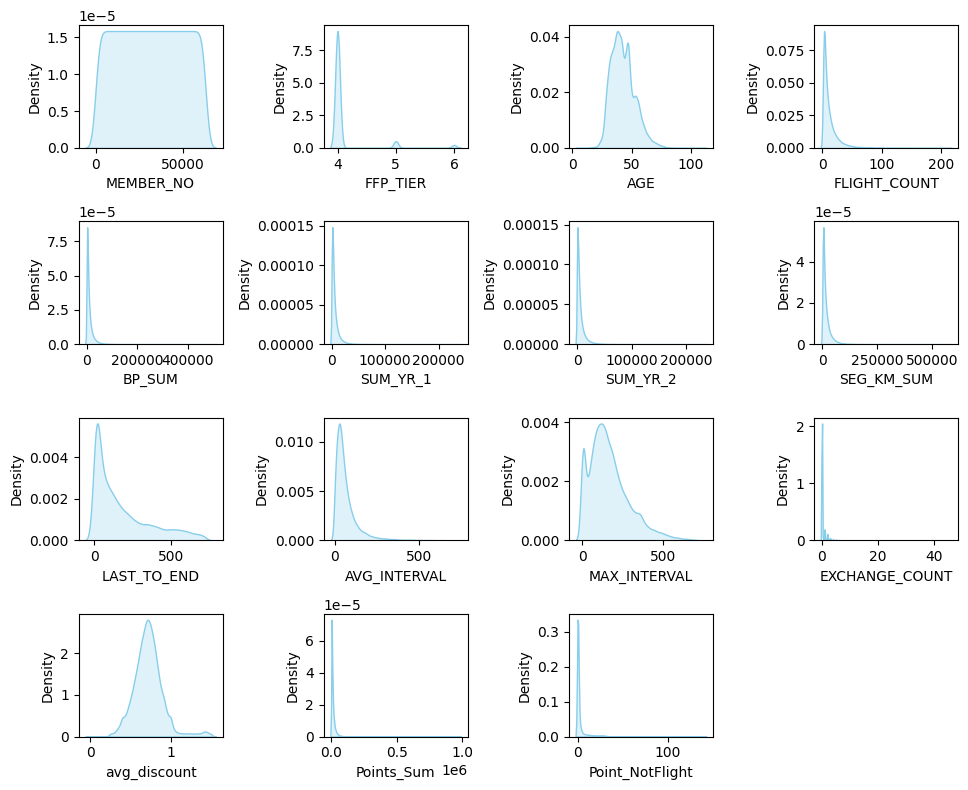

In [174]:
fig, axes = plt.subplots( nrows=int(np.ceil(len(num_col)/4)),ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

rata rata data kolom memiliki outlier

###  Multivariate Analysis

<Axes: >

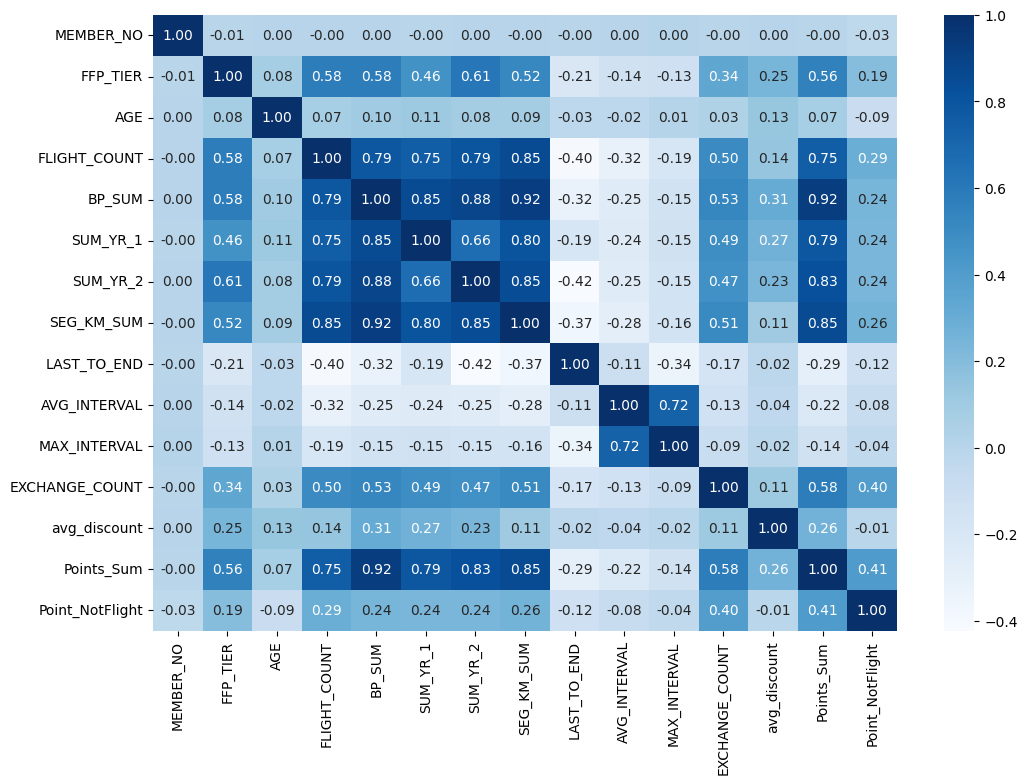

In [175]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

terdapat data yang redundan yakni <b>FLIGHT_COUNT,BP_SUM, SUM_YR_1,SUM_YR_2,SEG_KM_SUM , dan Points_Sum</b>

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## Preprocessing 

### Handling missing value

In [177]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
MEMBER_NO                    0         0.000000
LAST_FLIGHT_DATE             0         0.000000
Points_Sum                   0         0.000000
avg_discount                 0         0.000000
EXCHANGE_COUNT               0         0.000000
MAX_INTERVAL                 0         0.000000
AVG_INTERVAL                 0         0.000000
LAST_TO_END                  0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
FFP_DATE                     0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0

ada 6 kolom yang memiliki nilai null, karena presentase null masih sekitar 5% dari data makan akan dihapus  

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [179]:
df_cleaned = df.copy()

In [180]:
df_cleaned = df_cleaned.dropna()

In [181]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        58255 no

### Handling duplicate data

In [182]:
df_cleaned.duplicated().sum()

0

Tidak ada kolom duplicate

### Data Adjusment

sebelumnya telah dilakukan penyesuaian type data, tetapi jadi nilai yang null makan akan dilakukan dulu penyebabnya, dan dilakuakn penyesuaian data

In [183]:
mask_invalid = pd.to_datetime(df["LAST_FLIGHT_DATE"], errors="coerce").isna()
invalid_original = df.loc[mask_invalid, "LAST_FLIGHT_DATE"].unique()
print(invalid_original)


['2014/2/29  0:00:00']


In [184]:
print(df_cleaned.loc[df_cleaned["LAST_FLIGHT_DATE"].isna(), "LAST_FLIGHT_DATE"].unique())

[]


In [185]:
df_cleaned.loc[df_cleaned["LAST_FLIGHT_DATE"] == "2014/2/29  0:00:00", "LAST_FLIGHT_DATE"] = "2014-02-28"

In [186]:
df_cleaned["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["FIRST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LAST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["LAST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LOAD_TIME"] = pd.to_datetime(df_cleaned["LOAD_TIME"], errors="coerce")

Mengubah data yang sebelumnya bertype object menjadi datetime

In [187]:
df_cleaned.isna().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     395
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

## Feature encoding

In [188]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          58255 non-null  int64         
 1   FFP_DATE           58255 non-null  object        
 2   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 3   GENDER             58255 non-null  object        
 4   FFP_TIER           58255 non-null  int64         
 5   WORK_CITY          58255 non-null  object        
 6   WORK_PROVINCE      58255 non-null  object        
 7   WORK_COUNTRY       58255 non-null  object        
 8   AGE                58255 non-null  float64       
 9   LOAD_TIME          58255 non-null  datetime64[ns]
 10  FLIGHT_COUNT       58255 non-null  int64         
 11  BP_SUM             58255 non-null  int64         
 12  SUM_YR_1           58255 non-null  float64       
 13  SUM_YR_2           58255 non-null  float64       
 14  SEG_KM_SUM 

## Feature extraction 

In [189]:
df_cleaned["total_revenue"] = df_cleaned[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)

Membuat feature baru, total pendapatan dan receny untuk melihat kapan terakhir kali customer melakukan penerbangan 

In [190]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          58255 non-null  int64         
 1   FFP_DATE           58255 non-null  object        
 2   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 3   GENDER             58255 non-null  object        
 4   FFP_TIER           58255 non-null  int64         
 5   WORK_CITY          58255 non-null  object        
 6   WORK_PROVINCE      58255 non-null  object        
 7   WORK_COUNTRY       58255 non-null  object        
 8   AGE                58255 non-null  float64       
 9   LOAD_TIME          58255 non-null  datetime64[ns]
 10  FLIGHT_COUNT       58255 non-null  int64         
 11  BP_SUM             58255 non-null  int64         
 12  SUM_YR_1           58255 non-null  float64       
 13  SUM_YR_2           58255 non-null  float64       
 14  SEG_KM_SUM 

## Feature_Selection

In [191]:
num_col= df_cleaned.select_dtypes(include=['int64','float64']).columns

<Axes: >

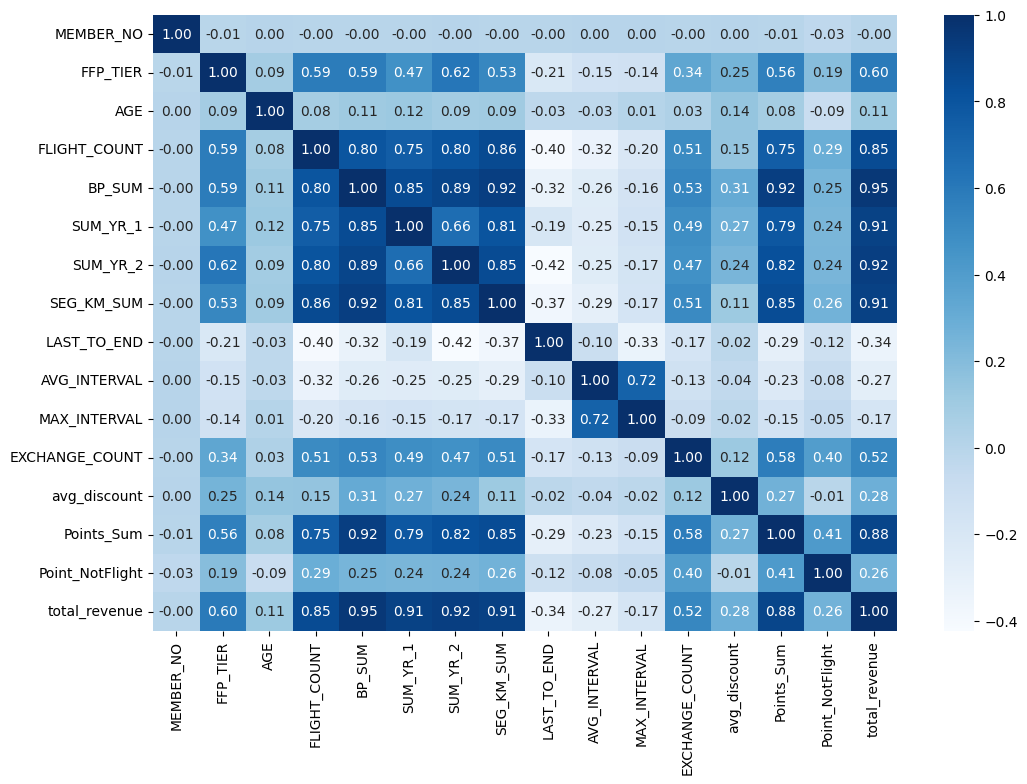

In [192]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

In [193]:
feats = ['FFP_TIER', 'FLIGHT_COUNT','AGE','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','total_revenue']


Memilih 7 Feature 
'FFP_TIER': karena merupakan 
 'FLIGHT_COUNT' : karena 
 'AGE': karena
 'LAST_TO_END': karena
 'AVG_INTERVAL': karena
 'MAX_INTERVAL': karena
 'total_revenue': karena